In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir

## Part 1
For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning techniques, such as text classification and text clustering (see the description of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of  5,500 terms. Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are also provided in separate files. The training and test data are on term x document format, containing a row for each term in the vocabulary and a column for each document. The values in the table represent raw term occurence counts. The data has already been preprocessed to extract tokens, remove stop words and perform stemming (so, the terms in the vocabulary are stems not full terms). Please be sure to read the readme.txt file in the distribution.

Your tasks in this problem are the following [Note: for this problem you should not use scikit-learn for classification, but create your own KNN classifer. You may use Pandas, NumPy, standard Python libraries, and Matplotlib.]

In [5]:
files = os.listdir(r"C:\\Users\Jesse\Downloads\!classes\Depaul\AU 20\hw 2")
files

['adult-modified.csv',
 'bank_data.csv',
 'modifiedterms.txt',
 'newsgroups.zip',
 'readme.txt',
 'testClasses.txt',
 'testMatrixModified.txt',
 'trainClasses.txt',
 'trainMatrixModified.txt']

#### My first step is to import all my data as dataframes and make sure everthing is imported properly.

In [6]:
train_MatrixModified_df = pd.read_csv("C:/Users/Jesse/Downloads/!classes/Depaul/AU 20/hw 2/" + files[8],sep="\t",header = None)

In [7]:
train_MatrixModified_df = train_MatrixModified_df.T # here I am taking the transpose so the documents are the rows.
train_MatrixModified_df

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train_Classes_df = pd.read_csv("C:/Users/Jesse/Downloads/!classes/Depaul/AU 20/hw 2/" + files[7], sep="\t", header = None, index_col = 0)

In [9]:
train_Classes_df.columns = ["class label"]
train_Classes_df.index.names = ["index doc num"]
train_Classes_df

,class label
index doc num,
0,0
1,1
2,0
3,1
4,0
...,...
795,0
796,1
797,1


In [10]:
modifiedterms_df = pd.read_csv("C:/Users/Jesse/Downloads/!classes/Depaul/AU 20/hw 2/" + files[2], sep="\t")

In [11]:
modifiedterms_df

,david
0,rex
1,wood
2,subject
3,call
4,librari
...,...
5494,shear
5495,handi
5496,inexperienc
5497,markw


In [12]:
test_MatrixModified_df = pd.read_csv("C:/Users/Jesse/Downloads/!classes/Depaul/AU 20/hw 2/" + files[6],sep="\t",header = None)

In [13]:
test_MatrixModified_df = test_MatrixModified_df.T
test_MatrixModified_df

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
test_Classes_df = pd.read_csv("C:/Users/Jesse/Downloads/!classes/Depaul/AU 20/hw 2/" + files[5],sep="\t",header = None, index_col = 0)

In [15]:
test_Classes_df.columns = ["class label"]
test_Classes_df.index.names = ["index doc num"]
test_Classes_df

,class label
index doc num,
0,1
1,0
2,0
3,1
4,1
...,...
195,1
196,1
197,0


In [16]:
# This code sums the number of occurancces of each word across all documents.
termFreqs = train_MatrixModified_df.sum(axis=1) 
print(termFreqs)

0      196.0
1       79.0
2       51.0
3       39.0
4       33.0
       ...  
795     31.0
796     43.0
797     88.0
798      2.0
799    101.0
Length: 800, dtype: float64


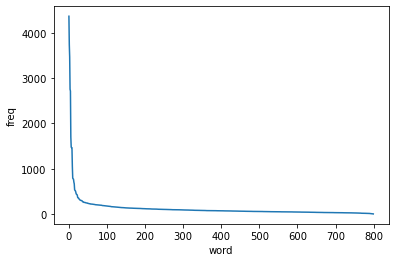

In [17]:
# plot the frequency of word occurrences.

plt.plot(sorted(termFreqs, reverse=True))
plt.xlabel("word") 
plt.ylabel("freq") 
plt.show()

In [18]:
# next I will convert all my dataframes to numpy arrays.
train_MatrixModified_df_numpy = np.array(train_MatrixModified_df)

train_Classes_df_numpy = np.array(train_Classes_df).flatten()

test_MatrixModified_df_numpy = np.array(test_MatrixModified_df)

test_Classes_df_numpy = np.array(test_Classes_df).flatten()

In [19]:
print(train_MatrixModified_df_numpy)

[[2. 2. 2. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
np.array(train_Classes_df_numpy)

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [21]:
test_MatrixModified_df_numpy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
np.array(test_Classes_df_numpy)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1], dtype=int64)

### readme.txt

The dataset is a subset of the 20 newsgroup corpus http://qwone.com/~jason/20Newsgroups/  in term-document format. This subset has been taken from http://mlg.ucd.ie/content/view/22/ (this data was modified to remove terms that did not appear in any of the documents). Each document belong to one of the two classes {Windows, Hockey}. The original data has been divided into test and train (20%, 80%) subsets.

The files contained in the archive file are as follows:

1. trainMatrixModified.txt: the term-document frequency matrix for the training documents. Each row of this matrix corresponds to one the terms and each column corresponds to one the documents and the (i,j)th element of the matrix shows the frequency of the ith term in the jth document. This matrix contains 5500 rows and 800 columns.

2. testMatrixModified.txt: the term-document frequency for the test documents. The matrix contains 5500 rows and 200 columns.

3. trainClasses.txt: This file contains the labels associated with each training document. Each line is in the format of documentIndex \t classId where the documentIndex is in the range of [0,800) and refers to the index of the document in the term-document frequency matrix for train documents. The classId refers to one of the two classes and takes one of the values 0 (for Windows) or 1 (for Hockey).

4. testClasses.txt: This file contains the labels associated with each test document. Each line is in the format of documentIndex \t classId where the documentIndex is in the range of [0,200) and refers to the index of the document in the term-document frequency matrix for test documents  

5. modifiedterms.txt: This file contains the set of 5500 terms in the vocabulary. Each line contains a term and corresponds to the corresponding rows in term-document frequency matrices.

## A
Create your own KNN classifier function. Your classifier should allow as input the training data matrix, 
the training labels, the instance to be classified, the value of K, and should return the predicted class for 
the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well 
as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, 
or add the distance metric as a parameter in the classifier function (an example implementation of a
KNN classifier was provided in class examples). 

In [23]:
from collections import Counter

In [24]:
def knn_search(training_data, training_lables, x_instance, k, dist_measure):

    if dist_measure == 0: # euclidean dist
        
        dist = np.sqrt(((training_data - x_instance)**2).sum(axis=1))
    
    elif dist_measure == 1: # cosine dist
        
        training_data_norm = np.array([np.linalg.norm(training_data[i]) for i in range(len(training_data))])
        x_norm = np.linalg.norm(x_instance)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(training_data,x_instance)/(training_data_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dist = 1 - sims
        
    index = np.argsort(dist)
    index_labels = training_lables[index[:k]]
    count = Counter(index_labels)
    predicted_label = count.most_common(1)[0][0]
    
    return index[:k], predicted_label

In [25]:
x_instance = test_MatrixModified_df_numpy[42] # a random instance from the test set
len(x_instance)

5500

In [26]:
index, predicted_label = knn_search(train_MatrixModified_df_numpy, train_Classes_df_numpy, x_instance, 5, 1)

In [27]:
index

array([570, 714, 115, 434, 487], dtype=int64)

In [28]:
def knn_classify(training_data, training_lables, test_data, test_lables, k, dist_measure):

    test_num = 0
    correct = 0
    test_size = len(test_data)
    
    for test in test_data:
        index, predicted_label  = knn_search(training_data, training_lables, test, k, dist_measure)
        
        # print("The predicted class for test {} is {} and the actual label is {}".format(test_num, predicted_label, 
                                                                                       #  test_lables[test_num]))
         
        if predicted_label == 0 and test_lables[test_num] == 0 or predicted_label == 1 and test_lables[test_num] == 1:
            correct += 1
            
        test_num += 1
    accuracy = correct/test_size
    
    print("The classifier accuracy of dist measure {} on test set of size {} is {}".format(dist_measure, 
                                                                                            test_size, accuracy))      
    
    return accuracy


Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier 
function in part a on all the test instances and in each case compares the actual test class label to the predicted 
class label. It should take as input the training data, the training labels, the test instances, the labels for test 
instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct 
predictions to the number of test instances) [See class notes: Classification & Prediction - Review of Basic Concepts]. 

In [29]:
accuracy = knn_classify(train_MatrixModified_df_numpy, train_Classes_df_numpy, test_MatrixModified_df_numpy, 
             test_Classes_df_numpy, 5, 0)

The classifier accuracy of dist measure 0 on test set of size 200 is 0.815


In [30]:
accuracy = knn_classify(train_MatrixModified_df_numpy, train_Classes_df_numpy, test_MatrixModified_df_numpy, 
             test_Classes_df_numpy, 5, 1)

The classifier accuracy of dist measure 1 on test set of size 200 is 0.97


Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Eculidean distance version vs. cosine similarity version).

In [31]:
euclidean_accuracy = []
cosine_accuracy = []

In [563]:
for k in range(5, 100, 5):
    euclidean_accuracy.append(knn_classify(train_MatrixModified_df_numpy, train_Classes_df_numpy, 
                                           test_MatrixModified_df_numpy, test_Classes_df_numpy, k, 0))

    


The classifier accuracy of dist measure 0 on test set of size 200 is 0.815
The classifier accuracy of dist measure 0 on test set of size 200 is 0.85
The classifier accuracy of dist measure 0 on test set of size 200 is 0.785
The classifier accuracy of dist measure 0 on test set of size 200 is 0.765
The classifier accuracy of dist measure 0 on test set of size 200 is 0.73
The classifier accuracy of dist measure 0 on test set of size 200 is 0.725
The classifier accuracy of dist measure 0 on test set of size 200 is 0.69
The classifier accuracy of dist measure 0 on test set of size 200 is 0.7
The classifier accuracy of dist measure 0 on test set of size 200 is 0.655
The classifier accuracy of dist measure 0 on test set of size 200 is 0.67
The classifier accuracy of dist measure 0 on test set of size 200 is 0.655
The classifier accuracy of dist measure 0 on test set of size 200 is 0.66
The classifier accuracy of dist measure 0 on test set of size 200 is 0.625
The classifier accuracy of dist 

In [564]:
for k in range(5,100,5):
    cosine_accuracy.append(knn_classify(train_MatrixModified_df_numpy, train_Classes_df_numpy, 
                                        test_MatrixModified_df_numpy, test_Classes_df_numpy, k, 1))  
    


The classifier accuracy of dist measure 1 on test set of size 200 is 0.97
The classifier accuracy of dist measure 1 on test set of size 200 is 0.985
The classifier accuracy of dist measure 1 on test set of size 200 is 0.985
The classifier accuracy of dist measure 1 on test set of size 200 is 0.975
The classifier accuracy of dist measure 1 on test set of size 200 is 0.97
The classifier accuracy of dist measure 1 on test set of size 200 is 0.98
The classifier accuracy of dist measure 1 on test set of size 200 is 0.98
The classifier accuracy of dist measure 1 on test set of size 200 is 0.98
The classifier accuracy of dist measure 1 on test set of size 200 is 0.975
The classifier accuracy of dist measure 1 on test set of size 200 is 0.98
The classifier accuracy of dist measure 1 on test set of size 200 is 0.975
The classifier accuracy of dist measure 1 on test set of size 200 is 0.98
The classifier accuracy of dist measure 1 on test set of size 200 is 0.975
The classifier accuracy of dist 

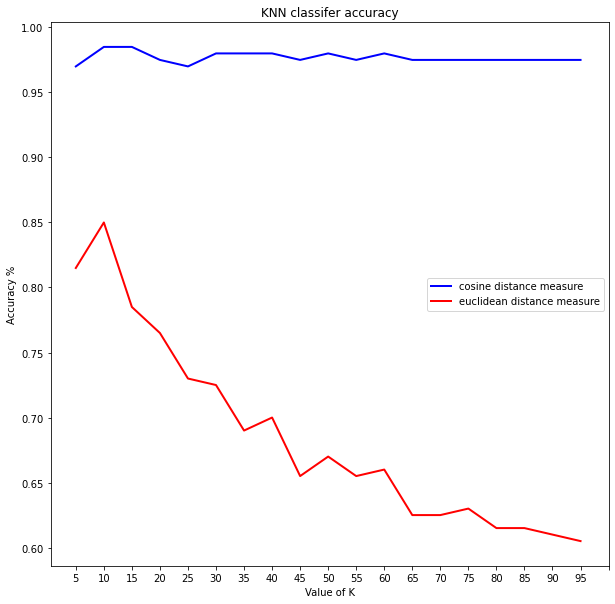

In [565]:
fig, ax = plt.subplots(figsize=[10,10])

plt.plot(cosine_accuracy, color='blue', linewidth=2)
plt.plot(euclidean_accuracy, color='red', linewidth=2)
plt.ylabel("Accuracy %")
plt.xlabel("Value of K")
plt.title("KNN classifer accuracy")
ax.set_xticklabels([i for i in range(5,100,5)])
ax.set_xticks([i for i in range(0,20)])
plt.legend(['cosine distance measure', 'euclidean distance measure'], loc='right')

Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation (only for the Cosine similairty version of the classifier) on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [32]:
print(train_MatrixModified_df)
print(train_Classes_df)
print(test_MatrixModified_df)
print(test_Classes_df)

     0     1     2     3     4     5     6     7     8     9     ...  5490  \
0     2.0   2.0   2.0   1.0   8.0   6.0   2.0   8.0   2.0   4.0  ...   0.0   
1     0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2     0.0   0.0   0.0   1.0   0.0   0.0   0.0   2.0   0.0   1.0  ...   0.0   
3     2.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4     2.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
795   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
796   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
797   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
798   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
799   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     5491  5492  5493  5494  5495  5496  5497  5498  5499  
0  

In [33]:
training_df = pd.DataFrame([(train_MatrixModified_df!=0).sum(1)]).T
training_df

,0
0,98
1,61
2,43
3,35
4,26
...,...
795,24
796,33
797,74
798,2


In [34]:
num_docs_mx = np.ones(np.shape(train_MatrixModified_df), dtype=float)*len(train_MatrixModified_df)
num_docs_mx 

array([[800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.],
       ...,
       [800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.],
       [800., 800., 800., ..., 800., 800., 800.]])

In [35]:
IDF_training = np.log2(np.divide(num_docs_mx, np.array(training_df)))
IDF_training

array([[3.02914635, 3.02914635, 3.02914635, ..., 3.02914635, 3.02914635,
        3.02914635],
       [3.71311885, 3.71311885, 3.71311885, ..., 3.71311885, 3.71311885,
        3.71311885],
       [4.21759144, 4.21759144, 4.21759144, ..., 4.21759144, 4.21759144,
        4.21759144],
       ...,
       [3.43440282, 3.43440282, 3.43440282, ..., 3.43440282, 3.43440282,
        3.43440282],
       [8.64385619, 8.64385619, 8.64385619, ..., 8.64385619, 8.64385619,
        8.64385619],
       [3.30400619, 3.30400619, 3.30400619, ..., 3.30400619, 3.30400619,
        3.30400619]])

In [36]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf_training = train_MatrixModified_df * IDF_training
TD_tfidf_training

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,6.058293,6.058293,6.058293,3.029146,24.233171,18.174878,6.058293,24.233171,6.058293,12.116585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,3.713119,3.713119,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,4.217591,0.000000,0.000000,0.000000,8.435183,0.000000,4.217591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.029146,0.000000,0.000000,4.514573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.886833,0.000000,0.000000,4.943416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,0.000000,5.058894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.000000,0.000000,0.000000,4.599462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.000000,0.000000,0.000000,3.434403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.000000,0.000000,0.000000,8.643856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
test_df = pd.DataFrame([(test_MatrixModified_df!=0).sum(1)]).T
num_docs_mx = np.ones(np.shape(test_MatrixModified_df), dtype=float)*len(test_MatrixModified_df)
IDF_test = np.log2(np.divide(num_docs_mx, np.array(test_df)))
TD_tfidf_test = test_MatrixModified_df * IDF_test

In [38]:
TD_tfidf_test

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,0.0,0.0,0.0,0.773491,0.0,0.0,0.0,0.0,0.0,0.773491,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,2.089267,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.0,-0.0,-0.0,-0.280956,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,...,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,0.0,0.0,0.0,1.888969,0.0,0.0,0.0,0.0,0.0,1.888969,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,2.599462,0.0,0.0,0.0,0.0,0.0,2.599462,...,2.599462,2.599462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.226004,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,4.473931,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,1.761213,0.0,0.0,0.0,0.0,0.0,1.761213,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
TD_tfidf_training = np.array(TD_tfidf_training)
TD_tfidf_test = np.array(TD_tfidf_test)

In [581]:
cosine_accuracy_IDF_TF = []

In [583]:
for k in range(5,100,5):
    cosine_accuracy_IDF_TF.append(knn_classify(TD_tfidf_training , train_Classes_df_numpy, 
                                        TD_tfidf_test, test_Classes_df_numpy, k, 1))  

The classifier accuracy of dist measure 1 on test set of size 200 is 0.97
The classifier accuracy of dist measure 1 on test set of size 200 is 0.95
The classifier accuracy of dist measure 1 on test set of size 200 is 0.94
The classifier accuracy of dist measure 1 on test set of size 200 is 0.93
The classifier accuracy of dist measure 1 on test set of size 200 is 0.925
The classifier accuracy of dist measure 1 on test set of size 200 is 0.935
The classifier accuracy of dist measure 1 on test set of size 200 is 0.935
The classifier accuracy of dist measure 1 on test set of size 200 is 0.93
The classifier accuracy of dist measure 1 on test set of size 200 is 0.925
The classifier accuracy of dist measure 1 on test set of size 200 is 0.93
The classifier accuracy of dist measure 1 on test set of size 200 is 0.925
The classifier accuracy of dist measure 1 on test set of size 200 is 0.93
The classifier accuracy of dist measure 1 on test set of size 200 is 0.925
The classifier accuracy of dist 

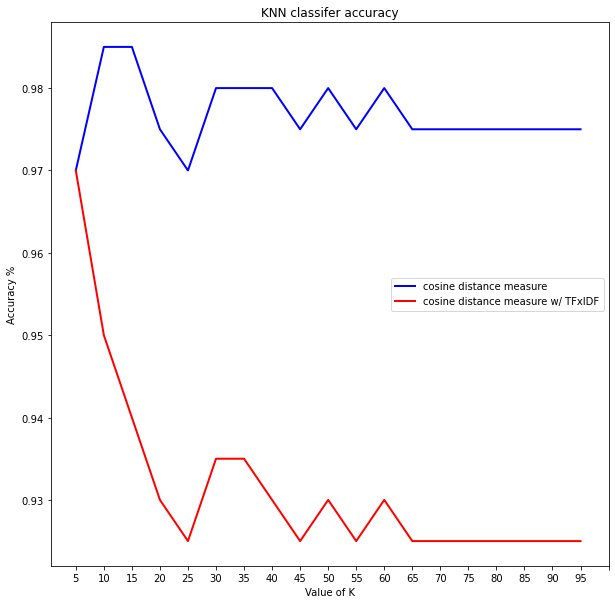

In [584]:
fig, ax = plt.subplots(figsize=[10,10])

plt.plot(cosine_accuracy, color='blue', linewidth=2)
plt.plot(cosine_accuracy_IDF_TF, color='red', linewidth=2)
plt.ylabel("Accuracy %")
plt.xlabel("Value of K")
plt.title("KNN classifer accuracy")
ax.set_xticklabels([i for i in range(5,100,5)])
ax.set_xticks([i for i in range(0,20)])
plt.legend(['cosine distance measure', 'cosine distance measure w/ TFxIDF'], loc='right')

Rerunning the Knn evaluation on the matrix with the TFxIDF matrix using cosine similarity and comparing it the to unweighted matrix using cosine similarity I see that, unlike what I expected the cosine distance measure with TFxIDF is not more accurate than the unweighted matrix. Only matching the accuracy where k=5 at 97%. 

################################

Create a new classifier based on the Rocchio Method adapted for text categorization [See class notes on Text Categorization]. You should separate the training function from the classifiation function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. 

The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. 

This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes.  

Finally, use your evaluation function to compare your results to the best KNN results you obtained in part d. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario.]

In [223]:
train_df = pd.read_csv("C:/Users/Jesse/Downloads/!classes/Depaul/AU 20/hw 2/" + files[8],sep="\t",
                                      header = None)
target_df = pd.read_csv("C:/Users/Jesse/Downloads/!classes/Depaul/AU 20/hw 2/" + files[7], sep="\t", 
                               header = None, index_col = 0)
test_df = pd.read_csv("C:/Users/Jesse/Downloads/!classes/Depaul/AU 20/hw 2/" + files[6],sep="\t",header = None)

test_target_df = pd.read_csv("C:/Users/Jesse/Downloads/!classes/Depaul/AU 20/hw 2/" + files[5],sep="\t",header = None, 
                              index_col = 0)

In [275]:
def Rocchio_Train(train, labels):
    
    unique = target_df.iloc[:,0].unique()
    numOfClasses = len(unique)
    prototype_dict = {}

    for x in range(numOfClasses):
    
        index = (target_df.iloc[:,0] == unique[x]) # indexs of class x
        df = train_df[target_df[index].index]  # rows of training df of index x
        prototype_vec = pd.Series(df.sum(axis=1)) # summ all the rows in the df with class label of x
        prototype_vec_list = prototype_vec.tolist() # covert the summed seriers into a list
        prototype_dict[unique[x]] = prototype_vec_list # add list to dict with key as class label
  
    
    return prototype_dict

In [391]:
def Rocchio_classifier(prototype, x_instance):
        
     
        training_data_norm = np.array([np.linalg.norm(prototype[i]) for i in range(len(prototype))])
        x_norm = np.linalg.norm(x_instance)
        x_instance = np.array(x_instance)
        
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = []
        for x in range(len(prototype)):
            prototype_inst = np.array(prototype[x])
            sim = np.dot(prototype_inst, x_instance)/(training_data_norm[x] * x_norm)
            sims.append(sim)
        
        predicted_class = max(sims)
        predicted_class_index = sims.index(max(sims))
        print("The predicted label for the test instance is {}.".format(predicted_class_index))
        return sims, predicted_class_index


In [353]:
prototype_dict = Rocchio_Train(train_df, target_df)
sims, predicted_class_index = Rocchio_classifier(prototype_dict, test_df[0])
sims

The predicted label for the test instance is 1


[0.1583833604068815, 0.4412988961200159]

In [378]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [406]:
def Rocchio_evaluation(prototype, x_instance,  x_instance_label):
    test_size = len(x_instance.T)
    correct = 0
    for x in range(len(x_instance.T)):
        print("\n")
        print(x)
        
        x_instance_index = x_instance_label.iloc[x]
        x_instance_raw_label = x_instance_index.tolist()[0]
        
        sims, predicted_class_index = Rocchio_classifier(prototype, x_instance[x])
        
        print("The actual label is {}".format(x_instance_raw_label))
        
         
         
        if x_instance_raw_label == 0 and predicted_class_index == 0 or x_instance_raw_label == 1 and predicted_class_index == 1:
            correct += 1
    print("\n")
    accuracy = correct/test_size
    print("The total accuracy is {}.".format(accuracy))


In [405]:
Rocchio_evaluation(prototype_dict, test_df, test_target_df)




0
The predicted label for the test instance is 1.
The actual label is 1


1
The predicted label for the test instance is 0.
The actual label is 0


2
The predicted label for the test instance is 1.
The actual label is 0


3
The predicted label for the test instance is 1.
The actual label is 1


4
The predicted label for the test instance is 1.
The actual label is 1


5
The predicted label for the test instance is 0.
The actual label is 0


6
The predicted label for the test instance is 1.
The actual label is 1


7
The predicted label for the test instance is 1.
The actual label is 1


8
The predicted label for the test instance is 0.
The actual label is 0


9
The predicted label for the test instance is 1.
The actual label is 1


10
The predicted label for the test instance is 0.
The actual label is 0


11
The predicted label for the test instance is 1.
The actual label is 1


12
The predicted label for the test instance is 0.
The actual label is 0


13
The predicted label for the te



112
The predicted label for the test instance is 0.
The actual label is 0


113
The predicted label for the test instance is 1.
The actual label is 1


114
The predicted label for the test instance is 1.
The actual label is 1


115
The predicted label for the test instance is 0.
The actual label is 0


116
The predicted label for the test instance is 1.
The actual label is 1


117
The predicted label for the test instance is 1.
The actual label is 1


118
The predicted label for the test instance is 0.
The actual label is 0


119
The predicted label for the test instance is 1.
The actual label is 1


120
The predicted label for the test instance is 0.
The actual label is 0


121
The predicted label for the test instance is 0.
The actual label is 0


122
The predicted label for the test instance is 1.
The actual label is 1


123
The predicted label for the test instance is 1.
The actual label is 1


124
The predicted label for the test instance is 0.
The actual label is 0


125
The pr

The Rocchio method of KNN is 97.5% accurate which is just below my top accuracy of 98.5% in my KNN of k = 5, 10 of cosine measure of distance.

In [355]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Load and preprocess the data using Pandas or similar tools. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (i.e., convert categorical attributes into numeric by creating dummy variables). Finally, split the transformed data into training and test sets (using 80%-20% randomized split). [Review Jupyter Notebooks from class to see examples of how to perform these tasks.]

In [48]:
bank_df = pd.read_csv(r"C:\\Users\Jesse\Downloads\!classes\Depaul\AU 20\hw 2\bank_data.csv", index_col = 0)

In [49]:
bank_df

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
ID12696,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
ID12697,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12698,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES


In [50]:
target_class = bank_df[['pep']]
target_class

,pep
id,
ID12101,YES
ID12102,NO
ID12103,NO
ID12104,NO
ID12105,NO
...,...
ID12696,NO
ID12697,NO
ID12698,YES


In [51]:
bank_df = pd.DataFrame(bank_df.drop(columns=['pep'], axis = 0 ))

In [52]:
bank_df

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO
...,...,...,...,...,...,...,...,...,...,...
ID12696,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES
ID12697,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12698,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO


In [53]:
bank_df_train, bank_df_test, bank_df_target_train, bank_df_target_test = train_test_split(bank_df, target_class, test_size=0.2, random_state=55)

In [54]:
bank_df_train = pd.get_dummies(bank_df_train)
bank_df_test = pd.get_dummies(bank_df_test)

Performing min-max normalization to rescale numeric attributes

In [55]:
min_max_scaler = preprocessing.MinMaxScaler().fit(bank_df_train)

bank_df_train_norm = min_max_scaler.transform(bank_df_train)
bank_df_train_norm = pd.DataFrame(bank_df_train_norm, columns=bank_df_train.columns, index=bank_df_train.index)

bank_df_test_norm = min_max_scaler.transform(bank_df_test)
bank_df_test_norm = pd.DataFrame(bank_df_test_norm, columns=bank_df_test.columns, index=bank_df_test.index)

In [56]:
bank_df_train_norm

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12462,0.775510,0.256465,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
ID12652,0.816327,0.468567,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
ID12154,0.612245,0.426388,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12569,0.510204,0.173708,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
ID12509,0.469388,0.291999,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID12448,0.979592,0.691301,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
ID12138,0.367347,0.143967,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
ID12642,0.428571,0.557073,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [57]:
bank_df_test_norm 

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12655,1.000000,0.534823,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12293,0.938776,0.757292,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12169,0.244898,0.247590,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12540,0.020408,0.179003,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
ID12693,0.612245,0.262472,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID12538,0.938776,0.454290,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
ID12107,0.081633,0.066468,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
ID12105,0.795918,0.783987,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [58]:
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import classification_report

In [59]:
bank_df_target_train = np.array(bank_df_target_train)
bank_df_target_train = bank_df_target_train.flatten()

In [60]:
for i in range(1,100,5):
    n_neighbors = i

    knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', p = 2)
    knnclf.fit(bank_df_train_norm, bank_df_target_train)
    knnpreds_test = knnclf.predict(bank_df_test_norm)
    print(str(i) + "\n") 
    print(classification_report(bank_df_target_test, knnpreds_test))

1

              precision    recall  f1-score   support

          NO       0.61      0.64      0.62        61
         YES       0.61      0.58      0.59        59

    accuracy                           0.61       120
   macro avg       0.61      0.61      0.61       120
weighted avg       0.61      0.61      0.61       120

6

              precision    recall  f1-score   support

          NO       0.68      0.75      0.71        61
         YES       0.71      0.63      0.67        59

    accuracy                           0.69       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.69      0.69      0.69       120

11

              precision    recall  f1-score   support

          NO       0.68      0.75      0.71        61
         YES       0.71      0.63      0.67        59

    accuracy                           0.69       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.69      0.69      0.69       120

16

     

In [61]:
n_neighbors = 25 # discuss why chose 25

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bank_df_train_norm, bank_df_target_train)
knnpreds_test = knnclf.predict(bank_df_test_norm)
print(classification_report(bank_df_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.70      0.80      0.75        61
         YES       0.76      0.64      0.70        59

    accuracy                           0.73       120
   macro avg       0.73      0.72      0.72       120
weighted avg       0.73      0.72      0.72       120



In my test its around where k = 25 that the classifier is the most accurate. I tried tunning the hyperparameters of number of neighbors, weights (distance vs uniform), and distance measure Euclidean vs Manhattan. The best results were found when k = 25, weights = distance and distance measure = Euclidean.

Overall, with these settings the model had a precision of 70% on pep No and 76% on pep yes. This means when pep was true for a class is was true 70% or 76% of the time. Recall was higher for No at 80% while for yes it was 64%. This means for no 80% of the actual trues where classified correctly and for yes 64% of actual trues were classified correctly. 

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
knncm = confusion_matrix(bank_df_target_test, knnpreds_test)
knncm 

array([[49, 12],
       [21, 38]], dtype=int64)

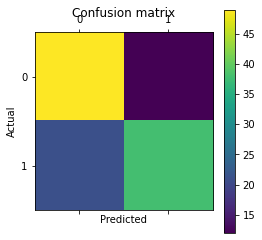

In [64]:
import pylab as plt
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). As above, generate the confusion matrix, classification report, and average accuracy scores the classifier. Compare the average accuracy score on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [65]:
bank_df_train
bank_df_test
bank_df_target_train
bank_df_target_test

,pep
id,
ID12655,NO
ID12293,YES
ID12169,NO
ID12540,NO
ID12693,NO
...,...
ID12538,YES
ID12107,YES
ID12105,NO


In [68]:
treecm = confusion_matrix(bank_df_target_test, bank_df_target_test)
treecm 

array([[61,  0],
       [ 0, 59]], dtype=int64)

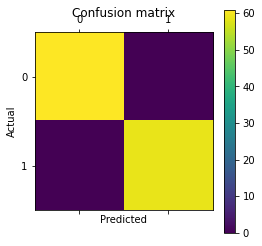

In [69]:
import pylab as plt
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [70]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(bank_df_train, bank_df_target_train)
treepreds_test = treeclf.predict(bank_df_test)
print("\n")
print("Accuracy of the tree on the training set: " + str(treeclf.score(bank_df_train, bank_df_target_train)))
print("\n")
print("Accuracy of the tree on the test set: " + str(treeclf.score(bank_df_test, bank_df_target_test)))
print("\n")
print(classification_report(bank_df_target_test, treepreds_test))



Accuracy of the tree on the training set: 1.0


Accuracy of the tree on the test set: 0.8583333333333333


              precision    recall  f1-score   support

          NO       0.87      0.85      0.86        61
         YES       0.85      0.86      0.86        59

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120



The decision tree had an average accuracy of 100% on the training data and 83% on the test data. Given that the training data is 100% accurate I can say that the tree model is overfitting or capturing all the variance in the data. From this I would say that the tree needs to be pruned. Given the 83% accuracy on the test data I would say the model is biased toward underfitting because there is a 17% gap in the accuracy between the training and test set. This difference between variance and bias demonstrates the bias variance trade off because the model captures all variance in the training data and is therefore biased in some way against the test data. Finally, I would say that this tree model dosent contain much bias because it pays a lot of attention to the traning data. 

#########

Create another decision tree model (trained on the non-normalized training data) using "entropy" as the selection criteria, min_samples_split=10, and max_depth=5. For this model generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

In [71]:
treeclf_2 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=5)
treeclf_2 = treeclf.fit(bank_df_train, bank_df_target_train)
treepreds_test_2 = treeclf.predict(bank_df_test)
print("\n")
print("Accuracy of the tree on the training set: " + str(treeclf.score(bank_df_train, bank_df_target_train)))
print("\n")
print("Accuracy of the tree on the test set: " + str(treeclf.score(bank_df_test, bank_df_target_test)))
print("\n")
print(classification_report(bank_df_target_test, treepreds_test_2))



Accuracy of the tree on the training set: 1.0


Accuracy of the tree on the test set: 0.8416666666666667


              precision    recall  f1-score   support

          NO       0.84      0.85      0.85        61
         YES       0.84      0.83      0.84        59

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



In [72]:
import graphviz
from sklearn.tree import export_graphviz

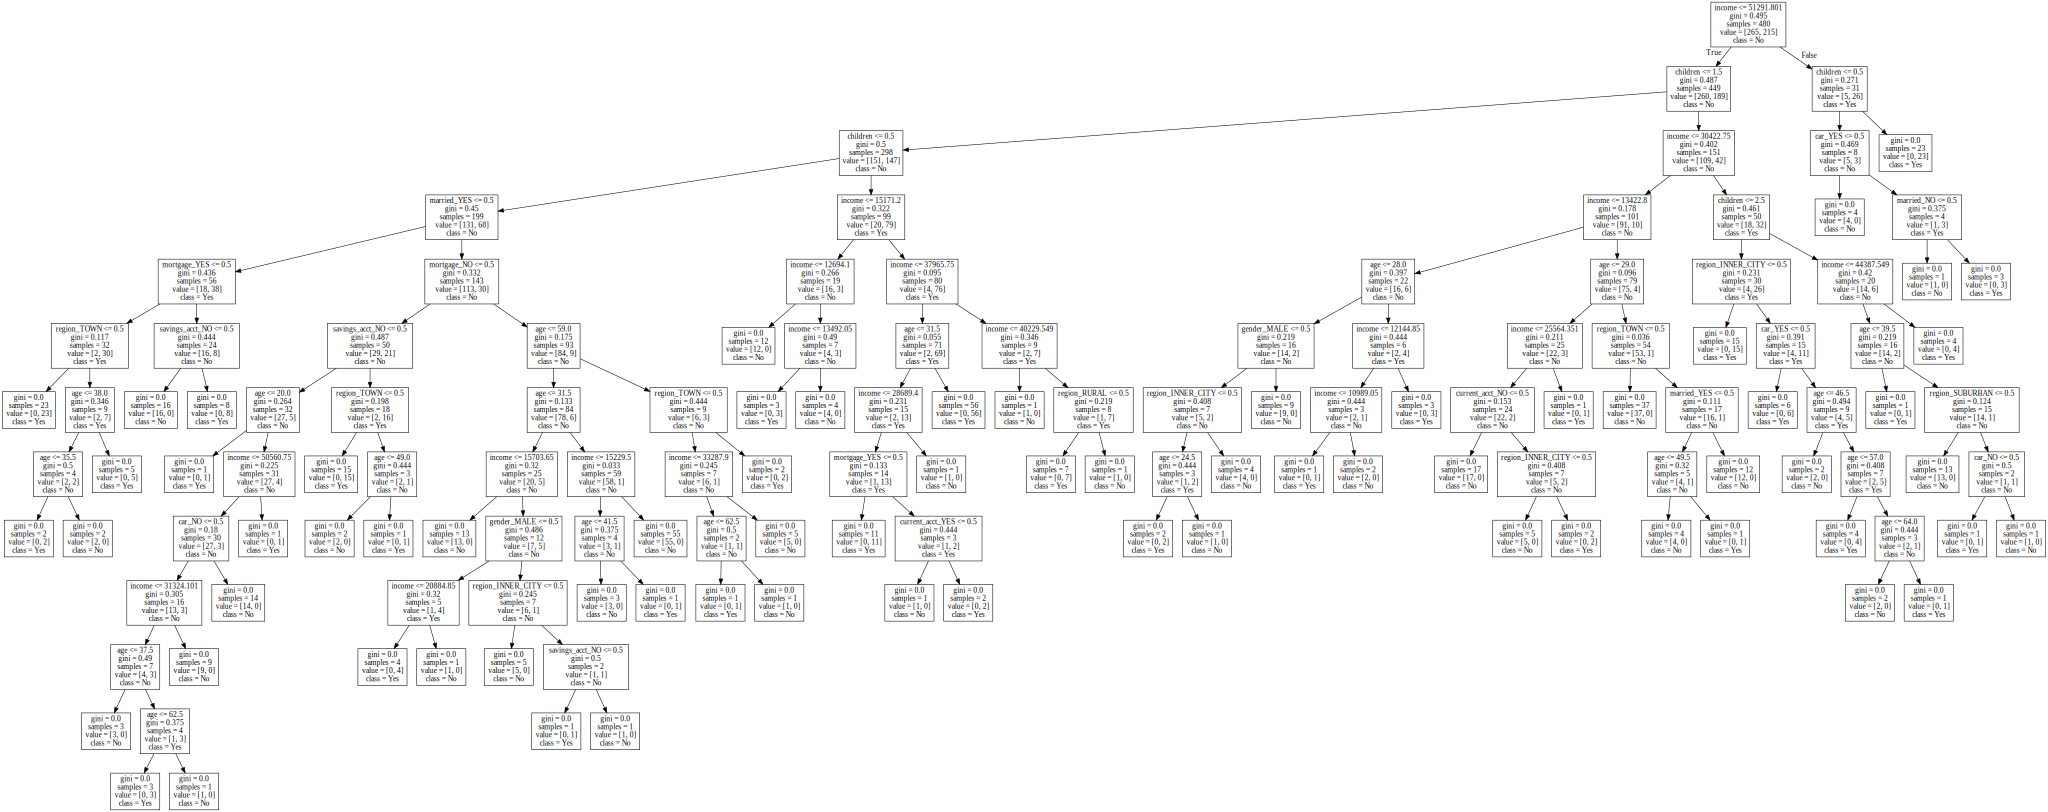

In [73]:
export_graphviz(treeclf_2,out_file='tree.dot', feature_names=bank_df_train.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [74]:
treecm_2 = confusion_matrix(bank_df_target_test, treepreds_test_2)
treecm_2 

array([[52,  9],
       [10, 49]], dtype=int64)

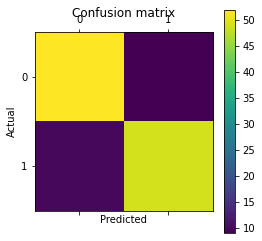

In [75]:
import pylab as plt
plt.matshow(treecm_2)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## part 3
Preprocessing and data analysis:

    Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the       case of numeric attributes, impute and fill-in the missing values using the attribute mean.
 

In [76]:
adult_df = pd.read_csv(r"C:\\Users\Jesse\Downloads\!classes\Depaul\AU 20\hw 2\adult-modified.csv", na_values=["?"])

In [77]:
adult_df

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.0,Private,10,Married,White,Male,60,>50K
9996,25.0,Private,9,Single,White,Female,8,<=50K
9997,21.0,Private,10,Single,Black,Male,40,<=50K
9998,NaN,Private,2,Married,White,Male,53,<=50K


In [78]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9802 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [79]:
adult_df[adult_df.isnull().any(axis=1)] 

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
...,...,...,...,...,...,...,...,...
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9987,67.0,NaN,4,Married,White,Male,40,<=50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


In [80]:
age_mean = adult_df.age.mean()
adult_df.age.fillna(age_mean, axis=0, inplace=True)

In [81]:
adult_df.drop(adult_df[adult_df.workclass.isnull()].index, axis=0, inplace=True)

In [82]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9412 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       9412 non-null   int64  
 3   marital-status  9412 non-null   object 
 4   race            9412 non-null   object 
 5   sex             9412 non-null   object 
 6   hours-per-week  9412 non-null   int64  
 7   income          9412 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB


Examine the characteristics of the attributes, including summary statistics for the attributes, histograms illustrating the distribtions of numeric attributes, and bar graphs showing value counts for categorical attributes.

In [83]:
adult_df.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.366342,10.125266,41.080217
std,12.962039,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


Text(0.5, 1.0, 'Histogram of hours-per-week')

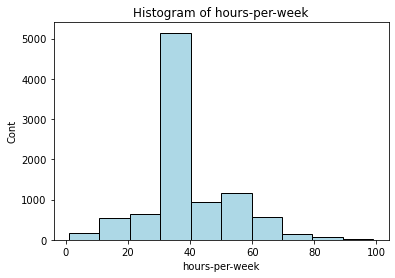

In [84]:
plt.hist(adult_df["hours-per-week"], bins=10, color='lightblue', edgecolor='black', linewidth=1)
plt.xlabel("hours-per-week")
plt.ylabel("Cont")
plt.title("Histogram of hours-per-week")

Text(0.5, 1.0, 'Histogram of education in years')

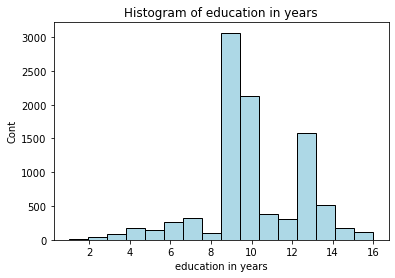

In [85]:
plt.hist(adult_df["education"], bins=16, color='lightblue', edgecolor='black', linewidth=1)
plt.xlabel("education in years")
plt.ylabel("Cont")
plt.title("Histogram of education in years")

Text(0.5, 1.0, 'Histogram of age')

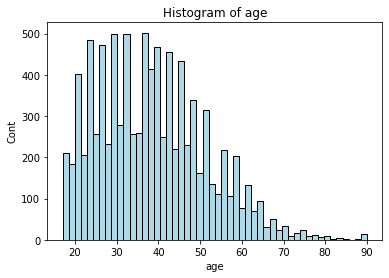

In [86]:
plt.hist(adult_df["age"], bins=50, color='lightblue', edgecolor='black', linewidth=1)
plt.xlabel("age")
plt.ylabel("Cont")
plt.title("Histogram of age")

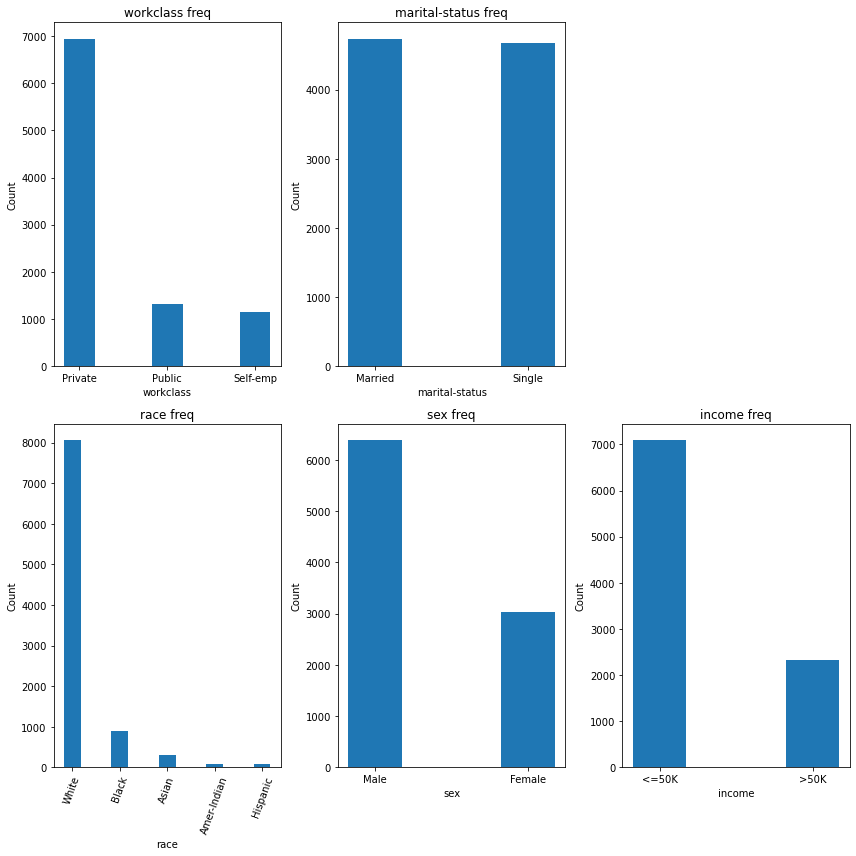

In [87]:
width = 0.35

N_1 = len(["Private", "Public", "Self-emp"])
ind_1 = np.arange(N_1)  

N_2 = len(["Married", "Single"])
ind_2 = np.arange(N_2)  

N_3 = len(["White", "Black", "Asian", "Amer-Indian", "Hispanic"])
ind_3 = np.arange(N_3)  

N_4 = len(["Male", "Female"])
ind_4 = np.arange(N_4)  

N_5 = len(["<=50K", ">50K"])
ind_5 = np.arange(N_5)  

# Create five polar axes and access them through the returned array

fig, axs = plt.subplots(2, 3, figsize=(12,12))

axs[0, 0].bar(ind_1, [6947, 1317, 1148], width=.35)
axs[0, 1].bar(ind_2, [4737, 4675], width=.35)
axs[1, 0].bar(ind_3, [8062, 892, 291, 92, 75], width=.35)
axs[1, 1].bar(ind_4, [6383, 3029], width=.35)
axs[1, 2].bar(ind_5, [7093, 2319], width=.35)

axs[0, 0].set(xlabel="workclass", ylabel="Count")
axs[0, 0].set_xticks(ind_1)
axs[0, 0].set_xticklabels(["Private", "Public", "Self-emp"])
axs[0, 0].set_title("workclass freq")

axs[0, 1].set(xlabel="marital-status", ylabel="Count")
axs[0, 1].set_xticks(ind_2)
axs[0, 1].set_xticklabels(["Married", "Single"])
axs[0, 1].set_title("marital-status freq")

axs[1, 0].set(xlabel="race", ylabel="Count")
axs[1, 0].set_xticks(ind_3)
axs[1, 0].set_xticklabels(["White", "Black", "Asian", "Amer-Indian", "Hispanic"])
plt.setp( axs[1, 0].xaxis.get_majorticklabels(), rotation=70 )
axs[1, 0].set_title("race freq")

axs[1, 1].set(xlabel="sex", ylabel="Count")
axs[1, 1].set_xticks(ind_4)
axs[1, 1].set_xticklabels(["Male", "Female"])
axs[1, 1].set_title("sex freq")
                           
axs[1, 2].set(xlabel="income", ylabel="Count")
axs[1, 2].set_xticks(ind_4)
axs[1, 2].set_xticklabels(["<=50K", ">50K"])
axs[1, 2].set_title("income freq")

fig.delaxes(axs[0,2])
plt.tight_layout()

Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

In [88]:
ct_1 = pd.crosstab(adult_df["education"], adult_df["race"])
ct_1

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


The table of education by race shows the same trends for educational attainment across race. Although I would be hesitant to conclude that because this is a small sample size and the numbers have not been normalized by per capita rates. Given that caveat there seems to be a large proportion of people who drop out of high school in the 9th across all races. Futhermore, out of all the people who attend college only about 20% graduate.

In [89]:
ct_2 = pd.crosstab(adult_df["workclass"], adult_df["income"])
ct_2

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


For this tabulation of employment sector vs income I suspect a class imbalance problem because it is my understanding that the median household income in america is greater than 50 k a year and that the private sector pays more than the public sector. Finally, I would say that the private employes the most people while the number of people who work in the public sector or are self-employed is about the same.


In [90]:
ct_3 = pd.crosstab(adult_df["workclass"], adult_df["race"])
ct_3

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


Again I would metion this is a small sample size that is not normalized but it seems White and Asain people have a higher propartion of people who are either self-employed or in the public sector in contrast to Black, Hispanic, and American Indian people who have majority employment in the private sector.  


In [91]:
ct_4 = pd.crosstab(adult_df["race"], adult_df["income"])
ct_4

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


Whites have the highest precentge of people making over 50k, follwed by Asians, then Hispanics having 1/8 of the population making over 50k, and finally, Blacks and American Indians tied at about 1/9 making over 50k.

In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

In [92]:
Amer_Indian_perc = 83/(83+9)
Asian_perc = 224 / (224+67)
Black_perc = 773 / (773+119)
Hispanic_perc = 69 / (69+6)
White_perc = 5944 / (5944+2118)

([<matplotlib.axis.YTick at 0x7c10b39748>,
 <a list of 10 Text major ticklabel objects>)

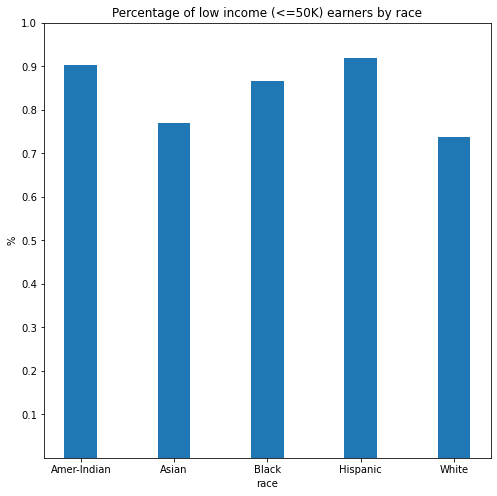

In [93]:
N_1 = len(["Amer-Indian", "Asian", "Black", "Hispanic", "White"])
ind_1 = np.arange(N_1)  

fig, axs = plt.subplots(figsize=(8,8))

axs.bar(ind_1, [Amer_Indian_perc, Asian_perc, Black_perc, Hispanic_perc, White_perc], width=.35)

axs.set(xlabel="race", ylabel="%")
axs.set_xticks(ind_1)
axs.set_xticklabels(["Amer-Indian", "Asian", "Black", "Hispanic", "White"])
plt.title("Percentage of low income (<=50K) earners by race")
plt.ylim((0,1))
plt.yticks(ticks=[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

Whites have about 75% of there population earning less than 50k, Asains have about 78%, then Blacks at 85%, then American Indain at 91%, and lastly Hispanic at 92% making less than 50k a year. 

Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

In [94]:
width = 0.35

N_1 = len(["young", "mid-age", "old"])
ind_1 = np.arange(N_1)  

N_2 = len(["private", "public", "self-emp"])
ind_2 = np.arange(N_2)  

N_3 = len([i for i in range(1,17)])
ind_3 = np.arange(N_3)  

N_4 = len(["married", "single"])
ind_4 = np.arange(N_4)  

N_5 = len(["Amer-Indian", "Asian", "Black", "Hispanic", "White"])
ind_5 = np.arange(N_5)  

N_6 = len(["male", "female"])
ind_6 = np.arange(N_6)  

N_7 = len(["(0, 20]", "(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 100]"])
ind_7 = np.arange(N_7)  

In [100]:
#adult_df["age"] = pd.qcut(adult_df["age"], 3, labels=["young", "mid-age", "old"])
adult_df["hours-per-week"] = pd.cut(x=adult_df["hours-per-week"], bins=[0, 20, 30, 40, 50, 60, 100], labels=['20', '30', '40', '50', '60', '100'])

In [101]:
adult_df.head(2)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,20,<=50K


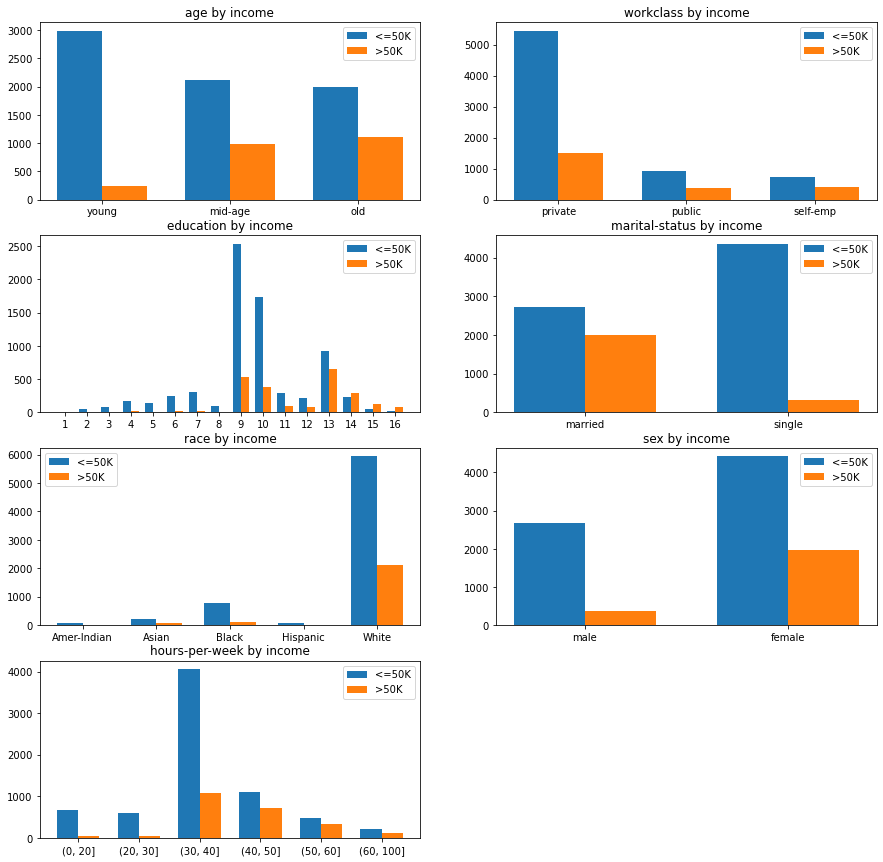

In [102]:
fig, ax = plt.subplots(4, 2, figsize=(15,15))

rects1 = ax[0,0].bar(ind_1, [2988, 2119, 1986], .35, label='<=50K')
rects2 = ax[0,0].bar(ind_1 + width, [237, 981, 1101], .35, label='>50K')
ax[0,0].set_title('age by income')
ax[0,0].set_xticks(ind_1 + width / 2)
ax[0,0].set_xticklabels(("young", "mid-age", "old"))
ax[0,0].legend((rects1[0], rects2[0]), ('<=50K', '>50K'))

rects1 = ax[0,1].bar(ind_2, [5443, 925, 725], .35, label='<=50K')
rects2 = ax[0,1].bar(ind_2 + width, [1504, 392, 423], .35, label='>50K')
ax[0,1].set_title('workclass by income')
ax[0,1].set_xticks(ind_1 + width / 2)
ax[0,1].set_xticklabels(("private", "public", "self-emp"))
ax[0,1].legend((rects1[0], rects2[0]), ('<=50K', '>50K'))

rects1 = ax[1,0].bar(ind_3, [12, 45, 76, 164, 135, 245, 310, 93, 2539, 1737, 298, 221, 921, 225, 45, 27], .35, label='<=50K')
rects2 = ax[1, 0].bar(ind_3 + width, [0, 1, 5, 16, 7, 23, 14, 7, 526, 388, 91, 83, 656, 290, 126, 86], .35, label='>50K')
ax[1,0].set_title('education by income')
ax[1,0].set_xticks(ind_3 + width / 2)
ax[1,0].set_xticklabels(([str(i) for i in range(1,17)]))
ax[1,0].legend((rects1[0], rects2[0]), ('<=50K', '>50K'))

rects1 = ax[1,1].bar(ind_4, [2730, 4363], .35, label='<=50K')
rects2 = ax[1,1].bar(ind_4 + width, [2007, 312], .35, label='>50K')
ax[1,1].set_title('marital-status by income')
ax[1,1].set_xticks(ind_4 + width / 2)
ax[1,1].set_xticklabels(("married", "single"))
ax[1,1].legend((rects1[0], rects2[0]), ('<=50K', '>50K'))

rects1 = ax[2,0].bar(ind_5, [83, 224, 773, 69, 5944], .35, label='<=50K')
rects2 = ax[2,0].bar(ind_5 + width, [9, 67, 119, 6, 2118], .35, label='>50K')
ax[2,0].set_title('race by income')
ax[2,0].set_xticks(ind_5 + width / 2)
ax[2,0].set_xticklabels(("Amer-Indian", "Asian", "Black", "Hispanic", "White"))
ax[2,0].legend((rects1[0], rects2[0]), ('<=50K', '>50K'))

rects1 = ax[2,1].bar(ind_6, [2669, 4424], .35, label='<=50K')
rects2 = ax[2,1].bar(ind_6 + width, [360, 1959], .35, label='>50K')
ax[2,1].set_title('sex by income')
ax[2,1].set_xticks(ind_6 + width / 2)
ax[2,1].set_xticklabels(("male", "female"))
ax[2,1].legend((rects1[0], rects2[0]), ('<=50K', '>50K'))


rects1 = ax[3,0].bar(ind_7, [663, 598, 4063, 1092, 467, 210], .35, label='<=50K')
rects2 = ax[3,0].bar(ind_7 + width, [48, 36, 1082, 706, 334, 113], .35, label='>50K')
ax[3,0].set_title('hours-per-week by income')
ax[3,0].set_xticks(ind_7 + width / 2)
ax[3,0].set_xticklabels(("(0, 20]", "(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 100]"))
ax[3,0].legend((rects1[0], rects2[0]), ('<=50K', '>50K'))

fig.delaxes(ax[3,1])
plt.show()

From these charts I would that the people most likley to earn over 50 k are older, private sector, college educated, married, white, female, and working 30 hours a week or more.

The people least likely to earn over 50k are young people under 30, who work in the private sector, didnt graduate high school, are single, non-white, and work less than 30 hours a week. 

## Predictive Modeling and Model Evaluation:

Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps].

Split the data into training and test sets (80%-20% split).
Use scikit-learn to build classifiers usinng Naive Bayes (Gaussian), decision tree (using "gini" as selection criteria), and linear discriminant analysis (LDA).

For each of these perform 10-fold cross-validation on the training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this to the model accuracy on the training data. Finally, run your model on the set-aside test data.

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
adult_df2 = pd.read_csv(r"C:\\Users\Jesse\Downloads\!classes\Depaul\AU 20\hw 2\adult-modified.csv", na_values=["?"])

In [105]:
age_mean = adult_df2.age.mean()
adult_df2.age.fillna(age_mean, axis=0, inplace=True)
adult_df2.drop(adult_df2[adult_df2.workclass.isnull()].index, axis=0, inplace=True)

In [106]:
adult_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9412 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       9412 non-null   int64  
 3   marital-status  9412 non-null   object 
 4   race            9412 non-null   object 
 5   sex             9412 non-null   object 
 6   hours-per-week  9412 non-null   int64  
 7   income          9412 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB


In [107]:
adult_df2.head(2)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K


In [108]:
adult_df2 = pd.get_dummies(adult_df2)
adult_df2.head(2)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0


In [109]:
adult_target_class = adult_df2['income_>50K']
adult_target_class = np.array(adult_target_class).flatten()
adult_target_class

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [110]:
adult_df2

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.000000,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50.000000,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38.000000,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53.000000,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28.000000,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38.000000,10,60,1,0,0,1,0,0,0,0,0,1,0,1,0,1
9996,25.000000,9,8,1,0,0,0,1,0,0,0,0,1,1,0,1,0
9997,21.000000,10,40,1,0,0,0,1,0,0,1,0,0,0,1,1,0
9998,38.449806,2,53,1,0,0,1,0,0,0,0,0,1,0,1,1,0


In [111]:
adult_df2 = pd.DataFrame(adult_df2.drop(columns=['income_<=50K', 'income_>50K']))
adult_df2.head(2)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.0,13,13,0,0,1,1,0,0,0,0,0,1,0,1


In [112]:
adult_df2_train, adult_df2_test, adult_df2_target_train, adult_df2_target_test = train_test_split(adult_df2, adult_target_class, test_size=0.2, random_state=32)

In [113]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(adult_df2_train, adult_df2_target_train)
print("Score on Training: ", nbclf.score(adult_df2_train, adult_df2_target_train))

Score on Training:  0.715367246646301


In [114]:
cv_scores_nb = cross_val_score(nbclf, adult_df2_train, adult_df2_target_train, cv=10)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores_nb.mean(), cv_scores_nb.std() * 2))

Overall Accuracy on X-Val: 0.71 (+/- 0.04)


The crossvalidated accuracy for naive bayes was the same as the 80% training sample. 

In [115]:
treeclf_adult = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=5)
treeclf_adult = treeclf.fit(adult_df2_train, adult_df2_target_train)
print("Accuracy of the tree on the training set: " + str(treeclf_adult.score(adult_df2_train,  adult_df2_target_train)))

Accuracy of the tree on the training set: 0.9456767166954443


In [116]:
cv_scores_tree = cross_val_score(treeclf_adult, adult_df2_train, adult_df2_target_train, cv=10)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores_tree.mean(), cv_scores_tree.std() * 2))

Overall Accuracy on X-Val: 0.77 (+/- 0.02)


The crossvalidated accuracy for the decision tree was 76% compared to 94% accuracy of the 80% training sample. This implies the 80% training sample is biased in some way that is unveiled by 10-fold CV.

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [118]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(adult_df2_train, adult_df2_target_train)
print("Score on Training: " +  str(ldclf.score(adult_df2_train,  adult_df2_target_train)))

Score on Training: 0.807278523044229


In [119]:
cv_scores_lda = cross_val_score(ldclf, adult_df2_train, adult_df2_target_train, cv=10)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores_lda.mean(), cv_scores_lda.std() * 2))

Overall Accuracy on X-Val: 0.81 (+/- 0.02)


The crossvalidated accuracy for LDA was the same as the 80% training sample.

Finally, run your model on the set-aside test data.

In [120]:
nbclf_test = nbclf.fit(adult_df2_test, adult_df2_target_test)
print("Score on Navie Bayes Test data: ", nbclf_test.score(adult_df2_test, adult_df2_target_test))

Score on Navie Bayes Test data:  0.7296866702071163


In [121]:
treeclf_adult = treeclf.fit(adult_df2_test, adult_df2_target_test)
print("Accuracy of the tree on the test set: " + str(treeclf_adult.score(adult_df2_test, adult_df2_target_test)))

Accuracy of the tree on the test set: 0.9702602230483272


In [122]:
ldclf = ldclf.fit(adult_df2_test, adult_df2_target_test)
print("Score on LDA Test data: " +  str(ldclf.score(adult_df2_test, adult_df2_target_test)))

Score on LDA Test data: 0.8040361125862985


The accuracy on the Navie Bayes test data shows its a good model because the accuracy on the test set is the same as the CV score.

The accuracy on the decision tree test data shows its a great model because the accuracy on the test set is 97% the same as the CV score at 96%.

The accuracy on the LDA test data shows its a good model because the accuracy on the test set is 80% the same as the CV score at 80%.
